## Model Validation

**Course structure:**
* Chapter 1: Basic modeling in scikit-learn
* Chapter 2: Validation basics
* Chapter 3: Cross Validation
* Chapter 4: Selecting the best model with Hyperparameter tuning

### CHAPTER 1. Basic modeling in scikit-learn

#### 1.1 Introduction to model validation

**Model validation consists of:**
* Ensuring your model performs as expected on new data
* Testing model performance on holdout datasets
* Selecting the best model, parameters, and accuracy metrics
* Achieving the best accuracy for the data given

**Scikit-learn basic modeling review:**
* Creating a model by specifying the model type and parameters
* Fitting the model to training dataset
* Generating predictions for test dataset
    * Looking at accuracy metrics

In [1]:
# seen vs. unseen data
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

# get data and split into train and test
candy_df = pd.read_csv('11_datasets/candy-data.csv')

candy_df = candy_df.drop(['competitorname'], axis=1)
X = candy_df.iloc[:, :-1]
y = candy_df.iloc[:, -1]
X_train, X_test = X.iloc[:50], X.iloc[50:]
y_train, y_test = y.iloc[:50], y.iloc[50:]

# create model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# predict
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# train/test errors (metrics)
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)
print('Model error on seen data: {0:.2f}'.format(train_error))
print('Model error on unseen data: {0:.2f}'.format(test_error))


Model error on seen data: 3.35
Model error on unseen data: 10.85


#### 1.2 Regression models

**Two types of predictive models:**
1. Regression models (built for continuous variables)
2. Classification models (built for categorical variables)

* This course will ONLY focus on **Random Forest** models
* Decision tree is the basics of random forest models, it splits data until only a few or even a single observations remains
* Random forest regression models generate a bunch of different decision trees
* Use the mean prediction of these trees as final value

**Random Forest parameters:**
1. *'n_estimator'*: the number of trees in the forest
2. *'max_depth'*: the maximum depth of the trees
3. *'random_state'*: random seed
and so on...

**Feature Importance:**
* One feature for random forest models is feature importance
* It shows how important different features of the data were in the model
* Use *'.feature_importances_'* attribute

In [2]:
# set parameters and fit a model
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# use the same dataset as above exercise
# get data and split into train and test
candy_df = pd.read_csv('11_datasets/candy-data.csv')

candy_df = candy_df.drop(['competitorname'], axis=1)
X = candy_df.iloc[:, :-1]
y = candy_df.iloc[:, -1]
X_train, X_test = X.iloc[:50], X.iloc[50:]
y_train, y_test = y.iloc[:50], y.iloc[50:]

# create a model with parameters
rfr = RandomForestRegressor()
rfr.n_estimators = 100
rfr.max_depth = 6
rfr.random_state = 1111
rfr.fit(X_train, y_train)

# print feature importances
for i, item in enumerate(rfr.feature_importances_):
    print('{0:s}: {1:.2f}'.format(X_train.columns[i], item))

chocolate: 0.61
fruity: 0.02
caramel: 0.02
peanutyalmondy: 0.01
nougat: 0.02
crispedricewafer: 0.03
hard: 0.00
bar: 0.00
pluribus: 0.02
sugarpercent: 0.15
pricepercent: 0.11


#### 1.3 Classification models

* These models have **categorical responses:**
    * Newborn's hair color
    * Winner of a basketball game
    * Genre of the next song on the radio

**Interesting methods in classification models:**
* Besides *'.predict()'* method to **predict class**, classification models can also use *'.predict_proba()'* method to **predict probabilities**
* *'get_params()'* method is used to review which **parameters** went into a model
* *'.score()'* method is a quick way to look at the **overall accuracy** of the classification model


In [3]:
# classification predictions
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# get data
tic_tac_toe = pd.read_csv('11_datasets/tic-tac-toe.csv')
# print(tic_tac_toe.shape)
X = tic_tac_toe.drop(['Class'], axis=1)
y = tic_tac_toe['Class']

# convert categorical values to numbers
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

# split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1111)

# create a model
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)
rfc.fit(X_train, y_train)

# make predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)
print(pd.Series(classification_predictions).value_counts())
print('The first predicted probabilities are: {}'.format(probability_predictions[0]))

# get accuracy score
print(rfc.score(X_test, y_test))


1    563
0    204
dtype: int64
The first predicted probabilities are: [0.26524423 0.73475577]
0.817470664928292


In [4]:
# reusing model parameters
# print the classification model
print(rfc)

# print the model's random state parameter
print('The random state is: {}'.format(rfc.random_state))

# print all parameters
print('Printing the parameters dictionary: {}'. format(rfc.get_params()))

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)
The random state is: 1111
Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


### CHAPTER 2. Validation Basics

#### 2.1 Creating train, test and validation datasets

**Traditional dataset split:**
* Seen data (used for training)
* Unseen data (unavailable for training, used to assess model performance)
* Use *'train_test_split()'* method to achieve this

**Hyper-parameter tuning dataset split (second validation set):**
* Training: used for training
* Validation: used to assess the model's performance when using different parameter values
* Testing: test new unseen data

In [5]:
# create one holdout set
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# get data
tic_tac_toe = pd.read_csv('11_datasets/tic-tac-toe.csv')
X = tic_tac_toe.drop(['Class'], axis=1)
y = tic_tac_toe['Class']

# convert categorical values to numbers
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

# create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)
print(X_train.shape)
print(X_test.shape)

(862, 27)
(96, 27)


In [6]:
# create two holdout sets
# use same dataset as above exercise

# create temp training and testing dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# create final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(574,)
(192,)
(192,)


#### 2.2 Accuracy metrics: regression models

**Mean Absolute Error (MAE):**
* Simplest and most intuitive metic
* Treats all points equally
* Not sensitive to outliers

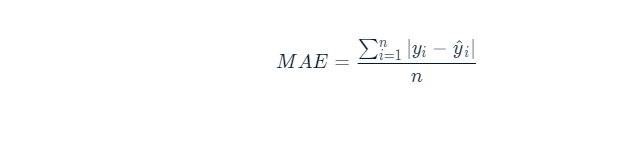

In [7]:
from IPython import display
display.Image("Images/11_mae.PNG")

**Mean Squared Error (MSE)**:
* Most widely used regression metric
* Allows outlier errors to contribute more to overall error

**NOTE:**
* Sometimes, we want to know a model's accuracy for a specific subset, such as on only chocolate candies

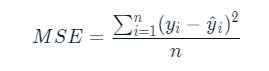

In [8]:
from IPython import display
display.Image("Images/11_mse.PNG")

In [9]:
# mean absolute error
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

# get manual data
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
                   55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])
predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
                        60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

# manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# use scikit-learn to calculate the MAE
mae_two = mae(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

# note two results are the same

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


In [10]:
# mean squared error
from sklearn.metrics import mean_squared_error as mse

# manually calculate the MSE
n = len(predictions)
mse_one = sum((y_test - predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# use the scikit-learn to calculate MSE
mse_two = mse(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

# note two results are the same

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


In [12]:
# performance on data subsets
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

# get manual data
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
                   55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])
predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
                        60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])
labels = np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
                   'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
                   'W', 'W', 'W', 'W'])

# find East conference and West conference teams
east_teams = labels == 'E'
west_teams = labels == 'W'

# create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

true_west = y_test[west_teams]
preds_west = predictions[west_teams]

# get the metrics
east_error = mae(true_east, preds_east)
west_error = mae(true_west, preds_west)
print('The MAE for East conference is {}'.format(east_error))
print('The MAE for the West conference is {}'.format(west_error))


The MAE for East conference is 6.733333333333333
The MAE for the West conference is 5.066666666666666


#### 2.3 Accuracy metrics: classification models

* Classification metrics are different than regression ones
* The metrics include:
    * **Precision**
    * **Recall**
    * **Accuracy**
    * F1-score and its alternate forms
    * and so on...

* A great way to calculate the first three metrics is **confusion matrix**
* Use *'confusion_matrix()'* method to achieve this

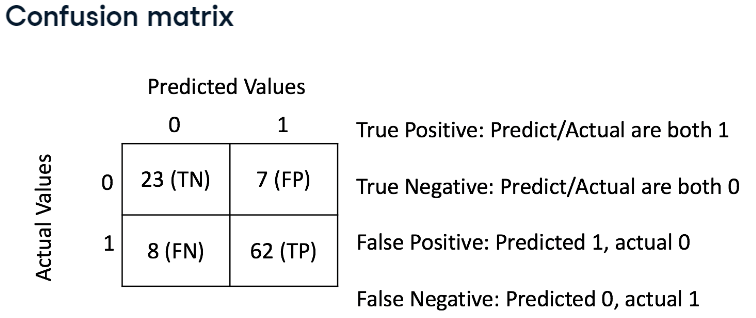

In [13]:
from IPython import display
display.Image("Images/11_confusion_matrix.PNG")

**Accuracy:**
* Accuracy is the easiest metric to understand and it represents all correct classifications

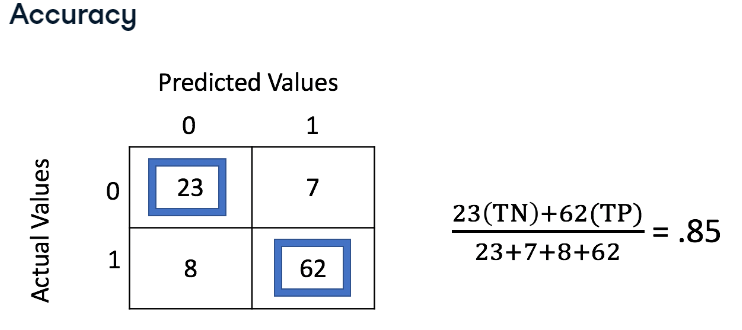

In [14]:
from IPython import display
display.Image("Images/11_accuracy.PNG")

**Precision:**
* It means all the number of positive values out of all predicted positive values
* It is used when we DO NOT want to over-predict positive values

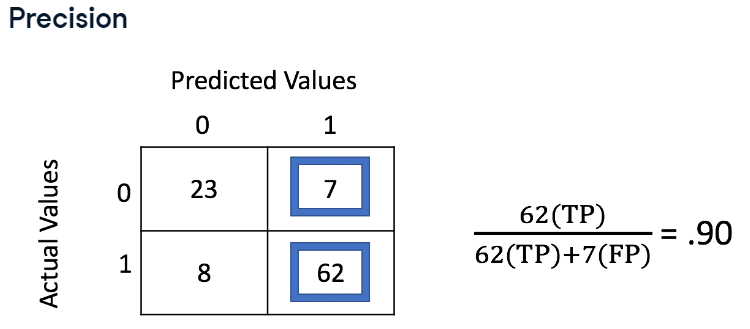

In [15]:
from IPython import display
display.Image("Images/11_precision.PNG")

**Recall:**
* It is about finding all positive values
* It means all number of positive values out of all actual positive values
* It is used when we CAN NOT afford to miss any positive values

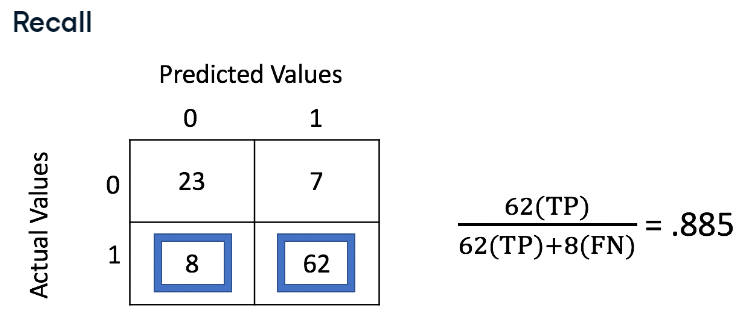

In [16]:
from IPython import display
display.Image("Images/11_recall.PNG")

In [17]:
# confusion matrix (i)
# get manual confusion matrix data
true_neg = 324
false_neg = 123
true_pos= 491
false_pos = 15

# calculate and print accuracy
accuracy = (true_neg + true_pos) / (true_neg + false_neg + true_pos + false_pos)
print('The overall accuracy is {0: .2f}'.format(accuracy))

# calculate and print precision
precision = (true_pos) / (true_pos + false_pos)
print('The precision is {0:.2f}'.format(precision))

# calculate and print recall
recall = (true_pos) / (true_pos + false_neg)
print('The recall is {0: .2f}'.format(recall))

The overall accuracy is  0.86
The precision is 0.97
The recall is  0.80


In [18]:
# confusion matrix (ii)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# get data
tic_tac_toe = pd.read_csv('11_datasets/tic-tac-toe.csv')
X = tic_tac_toe.drop(['Class'], axis=1)
y = tic_tac_toe['Class']

# convert categorical values to numbers
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

# split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# create a model and predict
rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)
test_predictions = rfc.predict(X_test)

# create and print confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)
print('The number of true positive is: {}'.format(cm[1,1]))

[[ 59   1]
 [  0 132]]
The number of true positive is: 132


In [19]:
# precision vs. recall
# use the same predictions from above exercise
from sklearn.metrics import precision_score, recall_score

# get precision and recall scores
precision_score = precision_score(y_test, test_predictions)
recall_score = recall_score(y_test, test_predictions)
print('The precision value is {0: .2f}'.format(precision_score))
print('The recall value is {0: .2f}'.format(recall_score))


The precision value is  0.99
The recall value is  1.00


#### 2.4 The bias-variance tradeoff

* 'Bias and variance' is used to **identify** when we have a *good fitting model*
* Variance:
1. Following the training data too closely and fails to generalize the testing data
2. Low training error but high testing error
3. Occurs when models are *over-fit* and high complexity
* Bias:
1. Fails to find the relationship between the data and the response
2. High training error and high testing error, too
3. Occurs when models are *under-fit*
* We have optimal performance model when the model is performing well on both training and testing data
* One way to check is to try additional parameter sets and check both training and testing error metrics

In [11]:
# error due to under/over-fitting
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# get data

### CHAPTER 3. Cross Validation

#### 3.1 The problem with holdout sets

*